In [1]:
import requests
from xml.etree import ElementTree as ET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import anderson
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
import os

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## DATASET

In [6]:
raw_fog = pd.read_csv(f'C:/Users/USER/DATA WORK PLACE/2. DATA STUDY/240508 WEATHER/data/fog_train.csv', encoding = 'euc-kr')
raw_fog = raw_fog.drop(['Unnamed: 0'], axis = 1)
raw_fog

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156455,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156456,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156457,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [7]:
raw_fog[raw_fog['fog_train.class'] < 0]

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
7645,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,-99,-99
7780,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,-99,-99
16053,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,-99,-99
16054,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,-99,-99
16055,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155926,K,12,28,7,10,EC,307.9,4.3,2.0,0.0,62.6,0.00,-1.4,-99,-99
3155961,K,12,28,13,0,EC,294.5,6.1,6.7,0.0,41.3,0.32,15.2,-99,-99
3156100,K,12,29,12,10,EC,16.3,3.5,4.7,0.0,43.2,0.34,14.6,-99,-99
3156135,K,12,29,18,0,EC,314.4,8.8,3.5,0.0,42.0,0.00,1.6,-99,-99


In [24]:
fog_data = raw_fog.copy()

fog_data = fog_data.replace(-99.00, np.NaN)
fog_data = fog_data.replace(-99.90, np.NaN)

columns = fog_data.columns
columns = [column.replace('fog_train.', "") for column in columns]
fog_data.columns = columns

fog_data

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0,4.0
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0,4.0
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0,4.0
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0,4.0
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0,4.0
3156455,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0,4.0
3156456,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0,4.0
3156457,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0,4.0


In [25]:
data = fog_data.copy()
month_list = data['month'].apply(lambda x: "0" + str(x) if x < 10 else x)
day_list = data['day'].apply(lambda x: "0" + str(x) if x < 10 else x)

dates = []

for i in range(len(month_list)):
    dates.append(str(month_list[i]) + "-" + str(day_list[i]))

data['dates'] = dates
data


,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class,dates
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0,4.0,01-01
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0,4.0,01-01
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0,4.0,01-01
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0,4.0,01-01
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0,4.0,01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0,4.0,12-31
3156455,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0,4.0,12-31
3156456,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0,4.0,12-31
3156457,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0,4.0,12-31


## EDA

### basis

In [26]:
data_eda = data.drop(['year', 'month', 'day', 'time', 'minute', 'dates'], axis = 1)
round(data_eda.describe(), 2)

,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
count,3150549.00,3150633.00,3152592.00,3141231.00,3152843.00,3112549.00,3067820.00,3133943.00,3133943.00
mean,185.75,2.19,13.43,0.05,66.87,0.10,16.09,19777.27,3.98
std,106.60,1.76,10.27,0.22,21.00,0.16,12.10,11990.38,0.20
min,0.00,0.00,-24.30,0.00,0.00,0.00,-4.90,1.00,1.00
25%,85.40,0.90,5.50,0.00,51.30,0.00,6.00,12500.00,4.00
50%,209.80,1.80,14.30,0.00,68.70,0.00,16.30,20000.00,4.00
75%,277.00,3.00,22.00,0.00,84.70,0.17,24.50,20000.00,4.00
max,360.00,22.50,37.80,1.00,100.00,26.87,70.10,60525.00,4.00


In [27]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156459 entries, 0 to 3156458
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   stn_id    object 
 1   ws10_deg  float64
 2   ws10_ms   float64
 3   ta        float64
 4   re        float64
 5   hm        float64
 6   sun10     float64
 7   ts        float64
 8   vis1      float64
 9   class     float64
dtypes: float64(9), object(1)
memory usage: 240.8+ MB


In [28]:
print(data['year'].unique())
print("")
print(str(len(data['year'].unique())) + "개 년도")

['I' 'J' 'K']

3개 년도


In [29]:
print(data['stn_id'].unique())
print("")
print(str(len(data['stn_id'].unique())) + "개 지역")

['AA' 'AB' 'AC' 'AD' 'AE' 'AF' 'AG' 'AH' 'BA' 'BB' 'BC' 'BD' 'CA' 'CB'
 'DA' 'DB' 'DC' 'EA' 'EB' 'EC']

20개 지역


### 결측치 확인

In [30]:
def null_check(df):
    
    print('[ 결측치 확인 ]')
    print("(전체 row 수 : ", len(df), ")")
    print('')
    print('-' * 35)

    for column in df.columns:
        
        if df[column].isna().sum() == 0:
            pass

        else:
            print()
            print(column + " 결측치 비율:", round(df[column].isna().sum() / len(df) * 100, 2), "%")
            print('-' * 35)

    msno.matrix(df = df, figsize = (5, 5), color = (0.8, 0.5, 0.2), fontsize = 7);

[ 결측치 확인 ]
(전체 row 수 :  3156459 )

-----------------------------------

ws10_deg 결측치 비율: 0.19 %
-----------------------------------

ws10_ms 결측치 비율: 0.18 %
-----------------------------------

ta 결측치 비율: 0.12 %
-----------------------------------

re 결측치 비율: 0.48 %
-----------------------------------

hm 결측치 비율: 0.11 %
-----------------------------------

sun10 결측치 비율: 1.39 %
-----------------------------------

ts 결측치 비율: 2.81 %
-----------------------------------

vis1 결측치 비율: 0.71 %
-----------------------------------

class 결측치 비율: 0.71 %
-----------------------------------


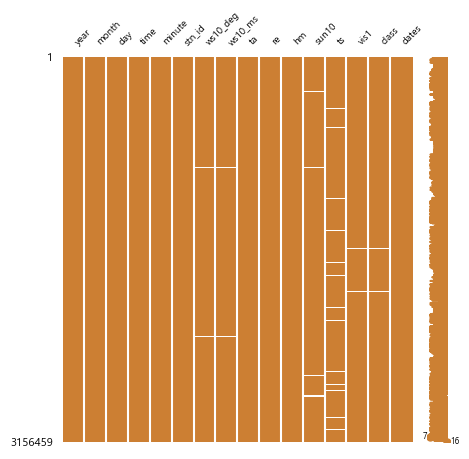

In [31]:
null_check(data)

### 컬럼별 분포 확인

In [32]:
def dist(df):

    dist_column_list = []

    for column in df.columns:
        if (df.dtypes[column] == 'int64') | (df.dtypes[column] == 'float'):
            dist_column_list.append(column)
        else:
            pass

    n_plot = len(dist_column_list)
    fig, axes = plt.subplots(n_plot, 1, figsize = (7, 20))
    for i, dist_column in enumerate(dist_column_list):
        axes[i].hist(df[dist_column].values, bins = 100, color = 'gray', edgecolor = 'gray')
        axes[i].set_title("[ " + dist_column + " ]" + " distribution")

    plt.tight_layout(h_pad = 3)
    plt.show()

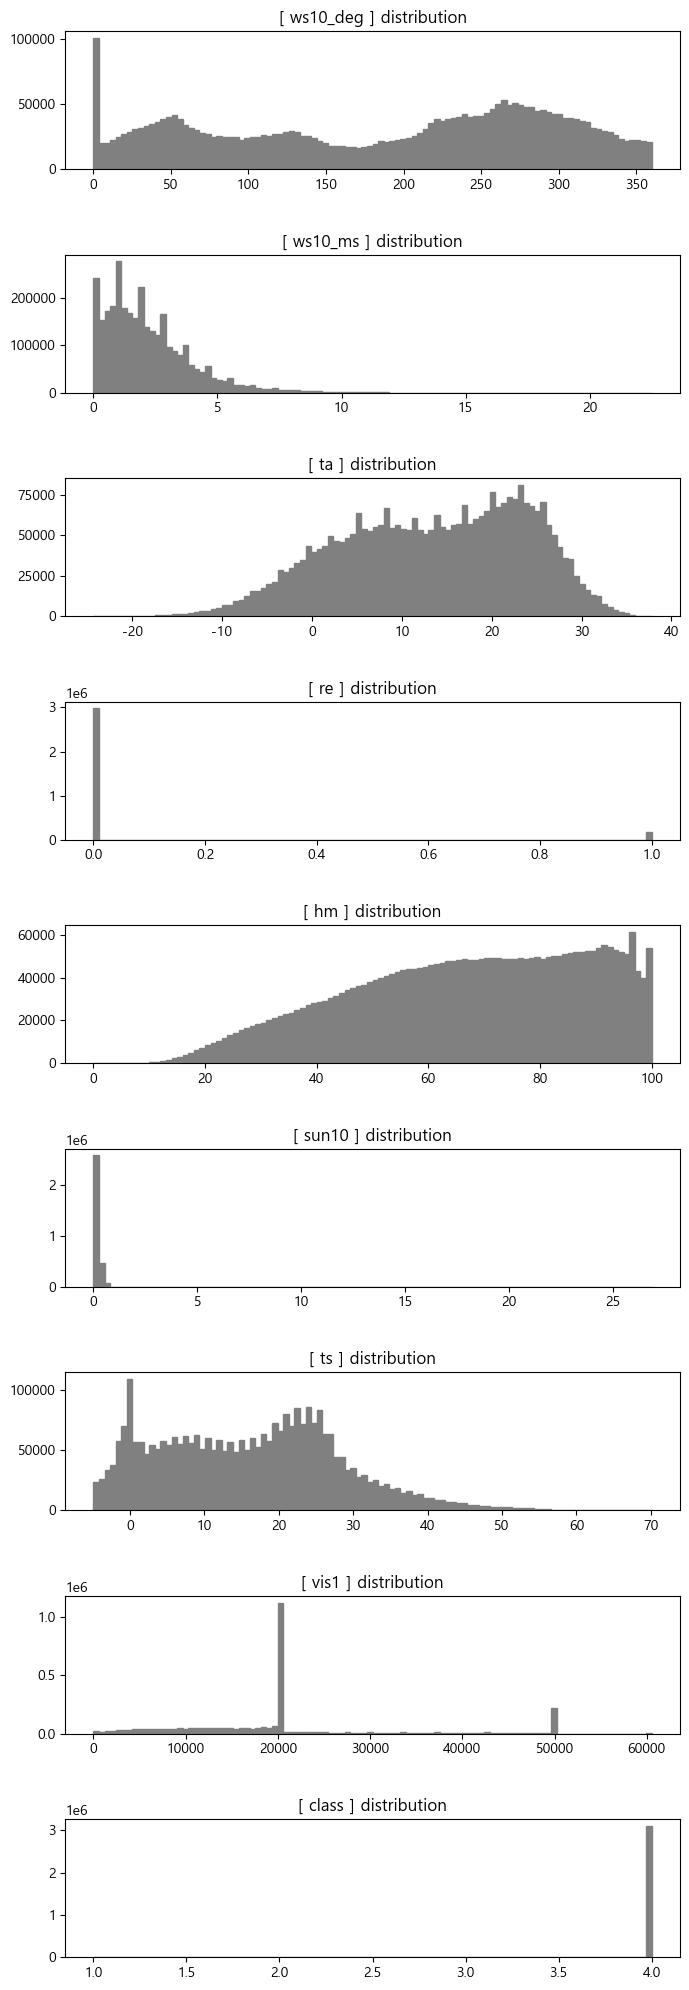

In [33]:
dist(data_eda)

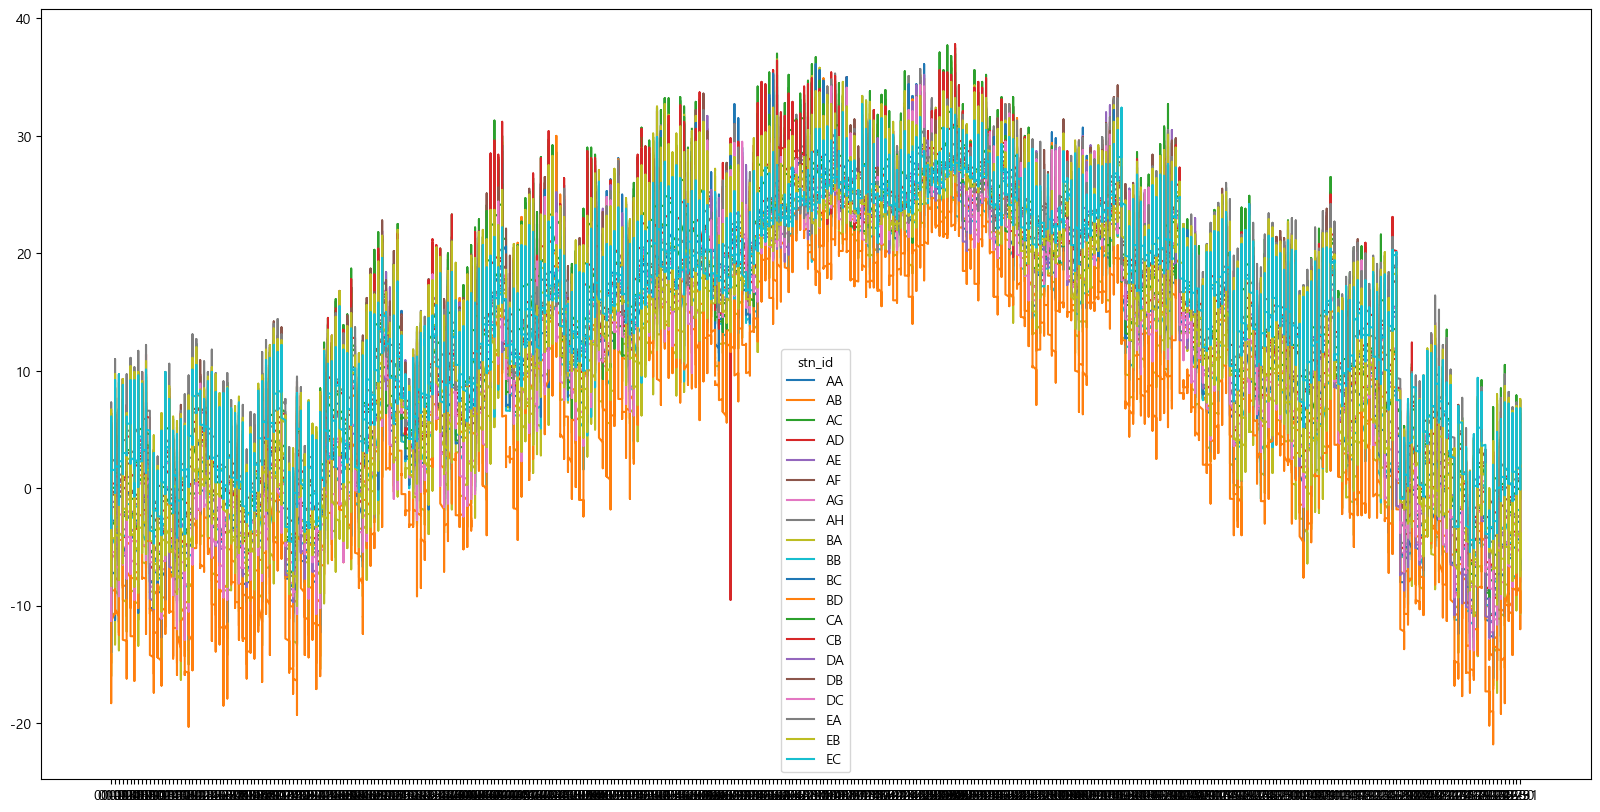

In [35]:
plt.figure(figsize = (20, 10))

data_line = data.drop(['month', 'day', 'time', 'minute'], axis = 1)

stations = data_line['stn_id'].unique()
for station in stations:
    subset_df = data_line[data_line['stn_id'] == station]
    subset_df = subset_df[subset_df['year'] == 'K']
    plt.plot(subset_df['dates'], subset_df['ta'], label = station)

plt.legend(title = 'stn_id')

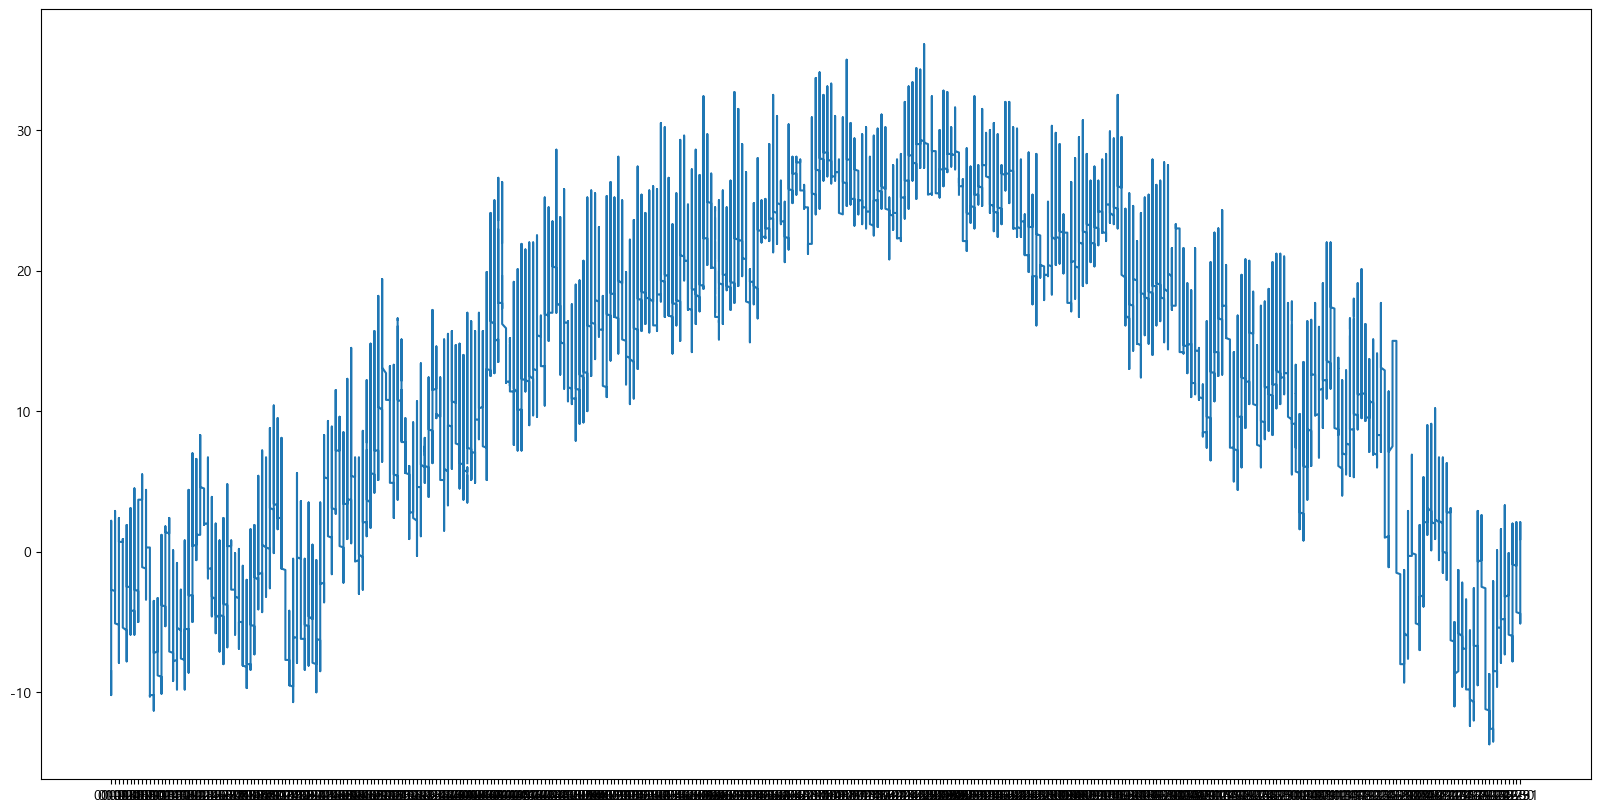

In [36]:
plt.figure(figsize = (20, 10))

data_line = data.drop(['month', 'day', 'time', 'minute'], axis = 1)
subset_df = data_line[data_line['stn_id'] == 'AA']
subset_df = subset_df[subset_df['year'] == 'K']
plt.plot(subset_df['dates'], subset_df['ta'])

In [35]:
def line(df, time_column, stn_column, year):

    line_column_list = []

    line_df = df.drop([time_column], axis = 1)
    x = df[time_column].values
    labels = line_df[stn_column].unique()

    line_df = line_df[line_df['year'] == year]

    for column in line_df.columns:
        if (line_df.dtypes[column] == 'int64') | (line_df.dtypes[column] == 'float'):
            line_column_list.append(column)
        else:
            pass

    n_plot = len(line_column_list)
    fig, axes = plt.subplots(n_plot, 1, figsize = (7, 30))
    for i, line_column in enumerate(line_column_list):
        axes[i].plot(x, line_df[line_column].values, label = labels)
        axes[i].set_title("[ " + line_column + " ]" + " plot")

    plt.tight_layout(h_pad = 3)
    plt.show()